## Employee Attrition Problem

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [ ]:
train_data = pd.read_csv('/content/train_dataset.csv')
train_data_salaries = pd.read_csv('/content/train_salaries.csv')
test_data = pd.read_csv('/content/test_dataset (1).csv')

###Knowing the data

In [ ]:
# checking the train data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0


In [ ]:
# checking the train data salaries
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [ ]:
# checking the test data
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [ ]:
# Adding salary data to train_dataset using merge on jobId

train_data = pd.merge(train_data, train_data_salaries, on = 'jobId')
train_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [ ]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary'] > 30]

### Basic Analysis

In [ ]:
# columns

train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [ ]:
# Checking which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [ ]:
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [ ]:
# len of train and test dataset

print('train data length', len(train_data))
print('test data length', len(test_data))

train data length 997548
test data length 1000000


In [ ]:
# getting no. unique values in each column in  train_dataset

for i in train_data.columns:
  print(i, ':',  len(train_data[i].unique()))

jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [ ]:
# counting missing values

train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
# dropping columns jobId and companyId as they are of no use for predicting salary

train_data = train_data.drop(['jobId','companyId'], axis = 1)
train_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [ ]:
test_data = test_data.drop(['jobId','companyId'], axis = 1)
test_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


### Check for categorical columns in the dataset

In [ ]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []

# looping on whole dataset for geting list of categorical data column name

for i in train_data.columns:
  if train_data[i].dtype == 'object':
    categorical_list.append(i)
  elif train_data[i].dtype == 'int64':
    var_list.append(i)
  elif train_data[i].dtype == 'float64':
    var_list.append(i)

print(categorical_list)
print(var_list)

['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


### Correlation Matrix

In [ ]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.00,0.37
milesFromMetropolis,0.00,1.00,-0.29
salary,0.37,-0.29,1.00


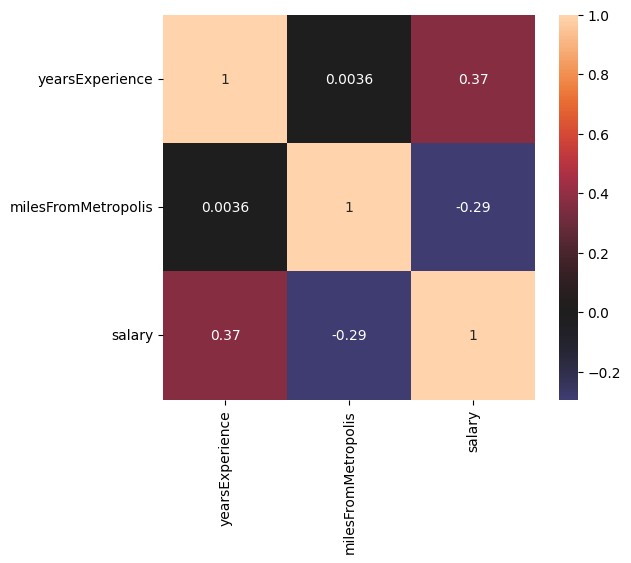

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.heatmap(corr, center = 0, annot = True)
plt.show()

From above correlation matrix:
1. yearsExperience and salary are positively correlated.
2. yearsExperience and milesFromMetropolis have no correlation.
3. milesFromMetropolis and salary are weakly negatively correlated.

### Chi-square Test

In [ ]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):

    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])

    #Observed Values
    observed_values = contingency_table.values

    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]

    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0, 0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)

    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)

    #chi-square statistic
    chi_square = sum([(o-e)**2 / e for o,e in zip(observed_values,expected_values )])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)

    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)

    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0,There is a relationship between 2 c

From above chi-square test, correlated variables:
  1. jobtype and degree
  2. jobtype and major
  3. degree and major

### EDA using plots

#### Scatter Plot

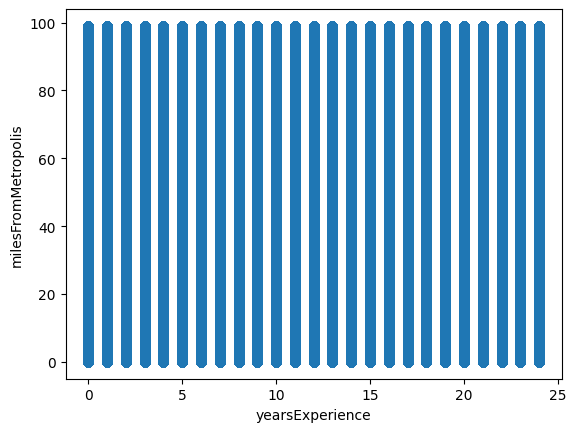

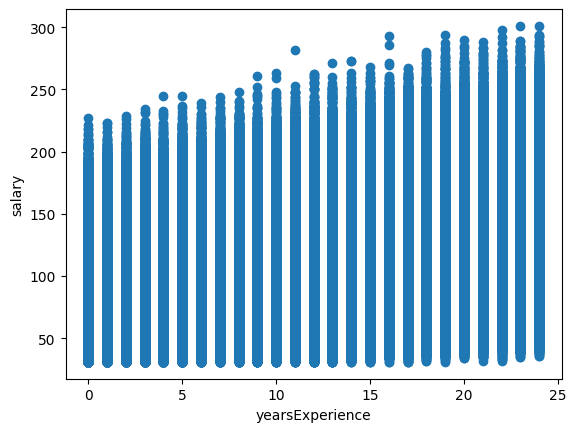

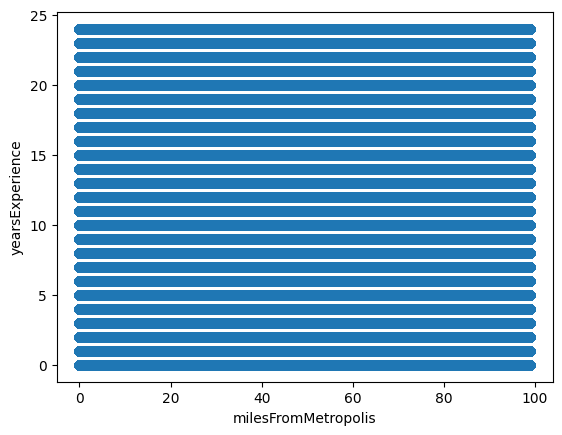

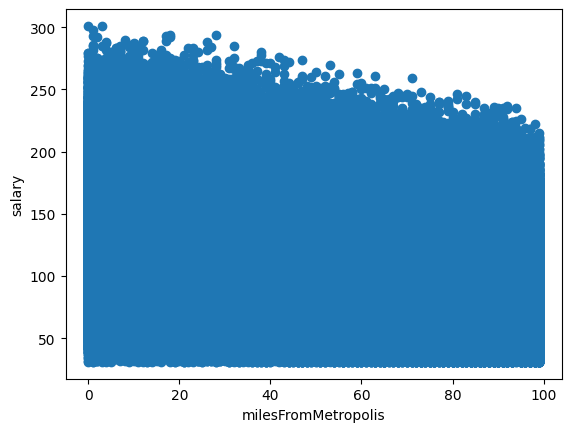

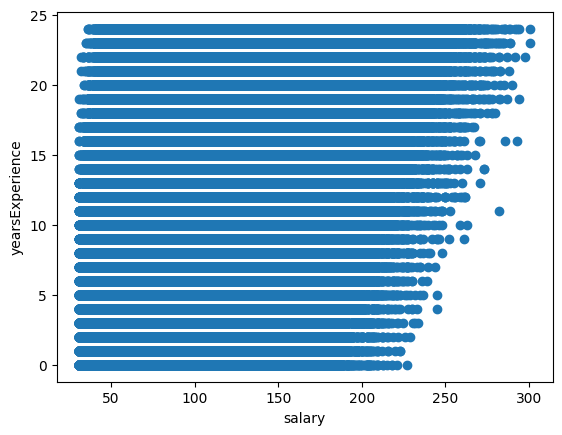

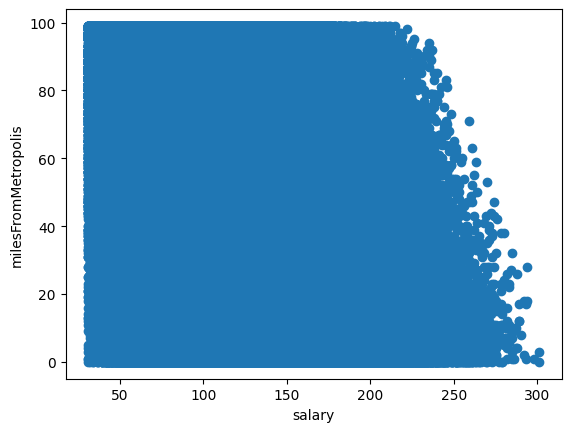

In [ ]:
# Scatter plot using matplotlib
# creating function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x], train_data[y])
  plt.show()

# Looping through the different columns
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.
2. Increase in value on
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.
3. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

#### Histogram

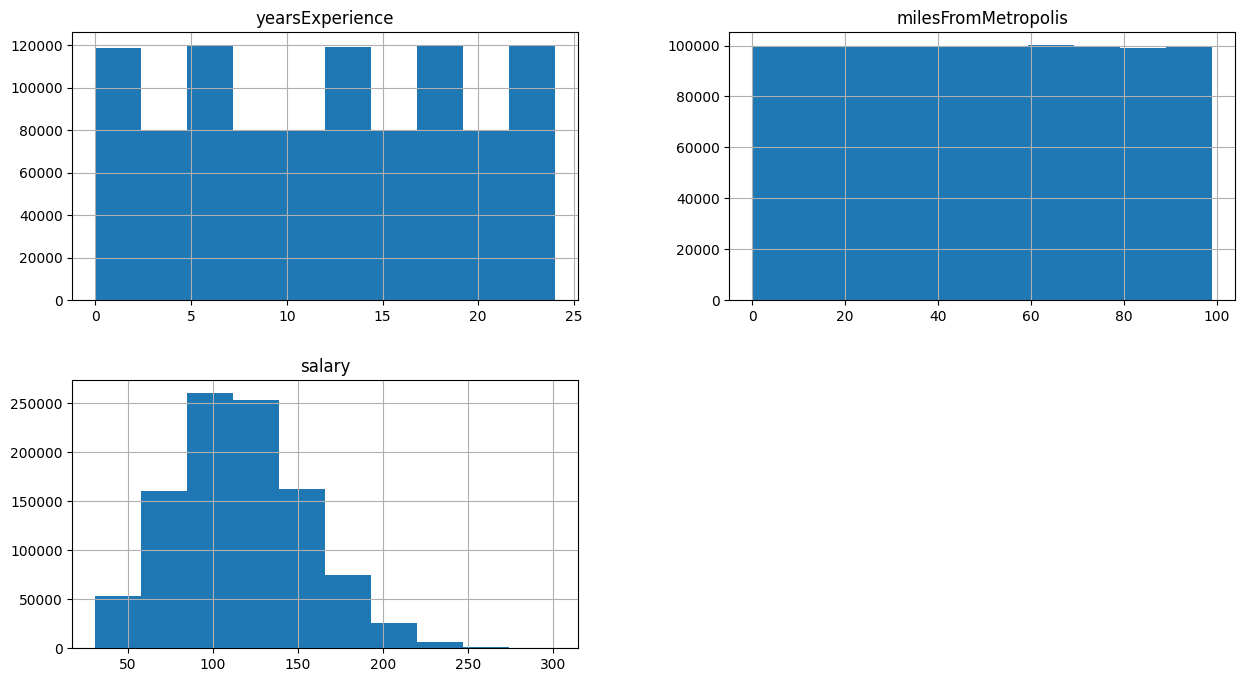

In [ ]:
# histogram
train_data.hist(figsize = (15,8))
plt.show()

From the above histogram:
1. yearsExperience data distribution is symmetric.
2. milesFromMetropolis data distribution is symmetric.
3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)

#### Box Plots

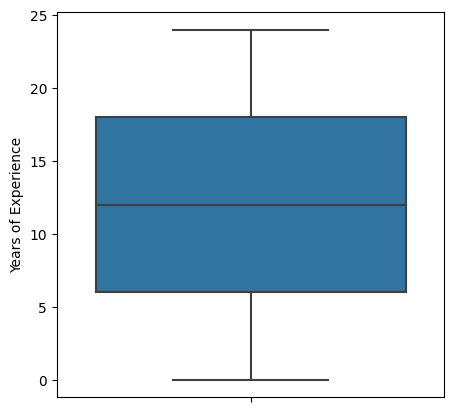

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(data = train_data, y = 'yearsExperience', orient = "h")
plt.ylabel("Years of Experience", fontsize = 10)
plt.show()

from above box plot graph:

yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

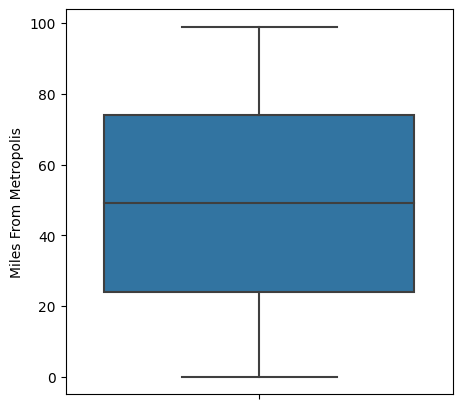

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(data = train_data, y = 'milesFromMetropolis', orient = "h")
plt.ylabel("Miles From Metropolis", fontsize = 10)
plt.show()

from above box plot graph:

-milesFromMetropolis
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 49.
  3. 25% of employee has value of milesFromMetropolis between range 49 to 74.
  4. 25% of employee has value of milesFromMetropolis between range 74 to 99

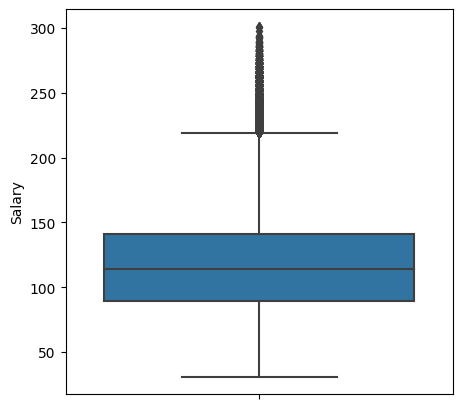

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(data = train_data, y = 'salary', orient = "h")
plt.ylabel("Salary", fontsize = 10)
plt.show()

from above box plot graph:

-Salary
  1. 25% of employees from dataset has value of salary between range 30 to 88.
  2. 25% of employee has value of salary between range 88 to 115.
  3. 25% of employee has value of salary between range 115 to 140.
  4. 25% of employee has value of salary between range 140 to 300

#### Voilion Plot

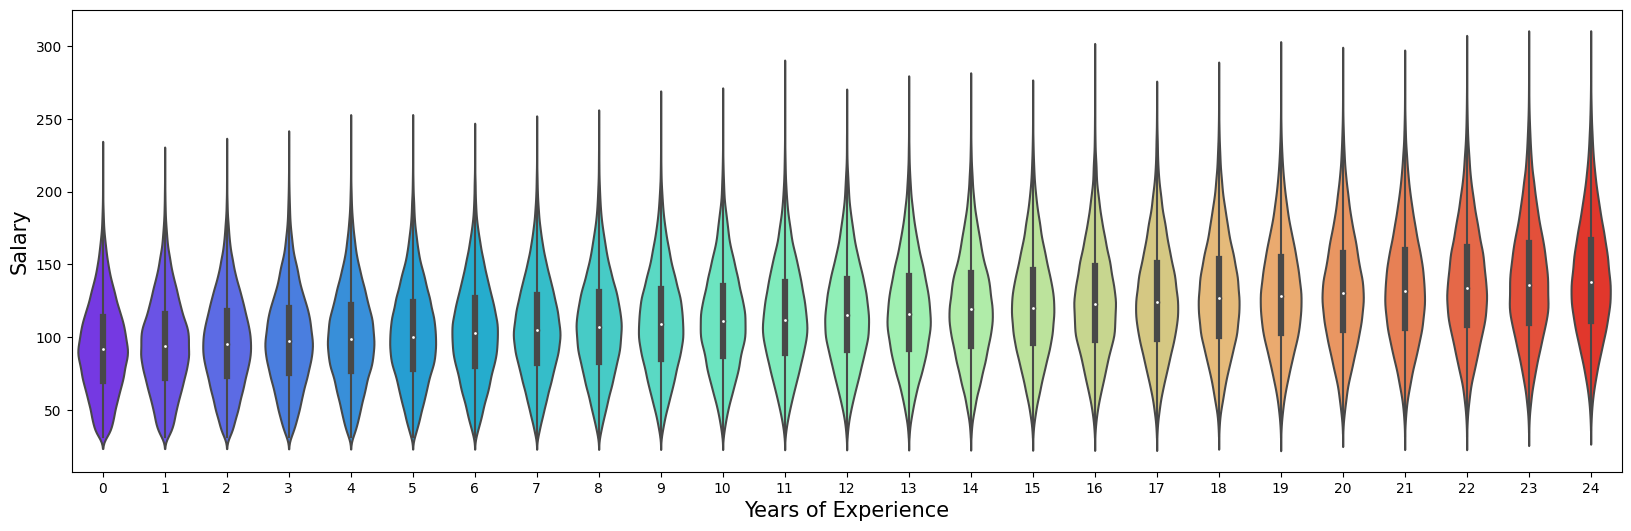

In [ ]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x = 'yearsExperience', y = 'salary', data = train_data, palette = 'rainbow')
plt.xlabel('Years of Experience', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

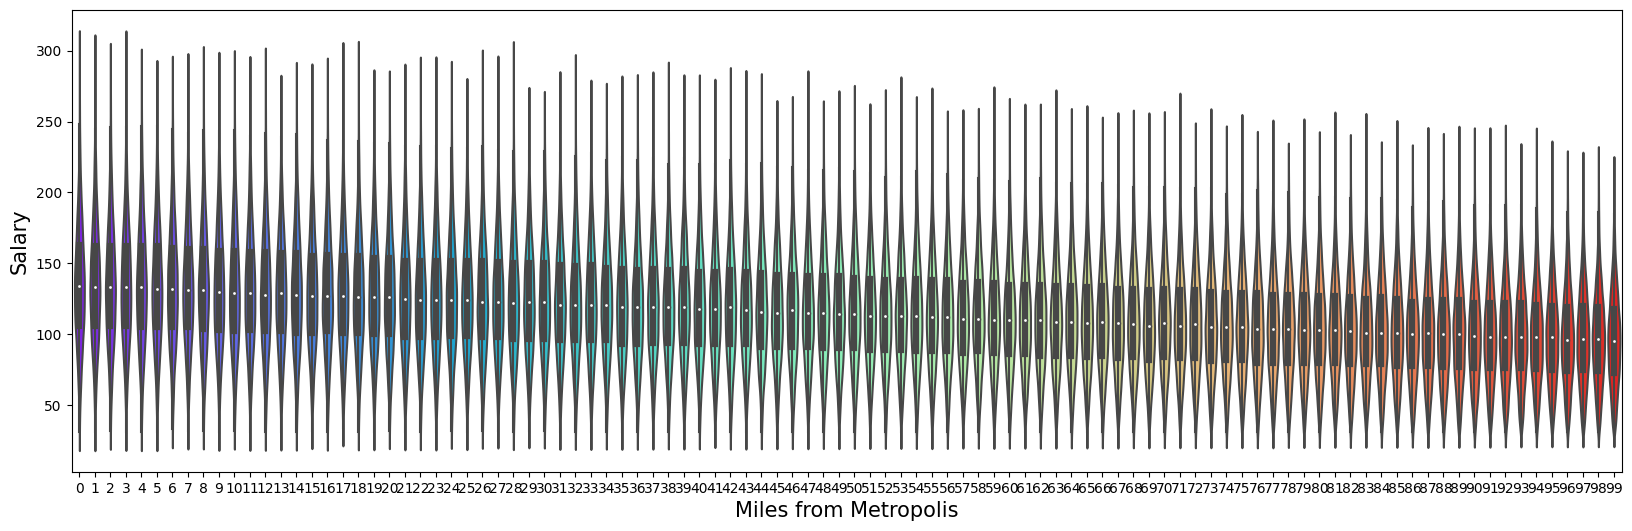

In [ ]:
# violin plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x = 'milesFromMetropolis', y = 'salary', data = train_data, palette = 'rainbow')
plt.xlabel('Miles from Metropolis', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)
plt.show()


from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

#### Boxenplot

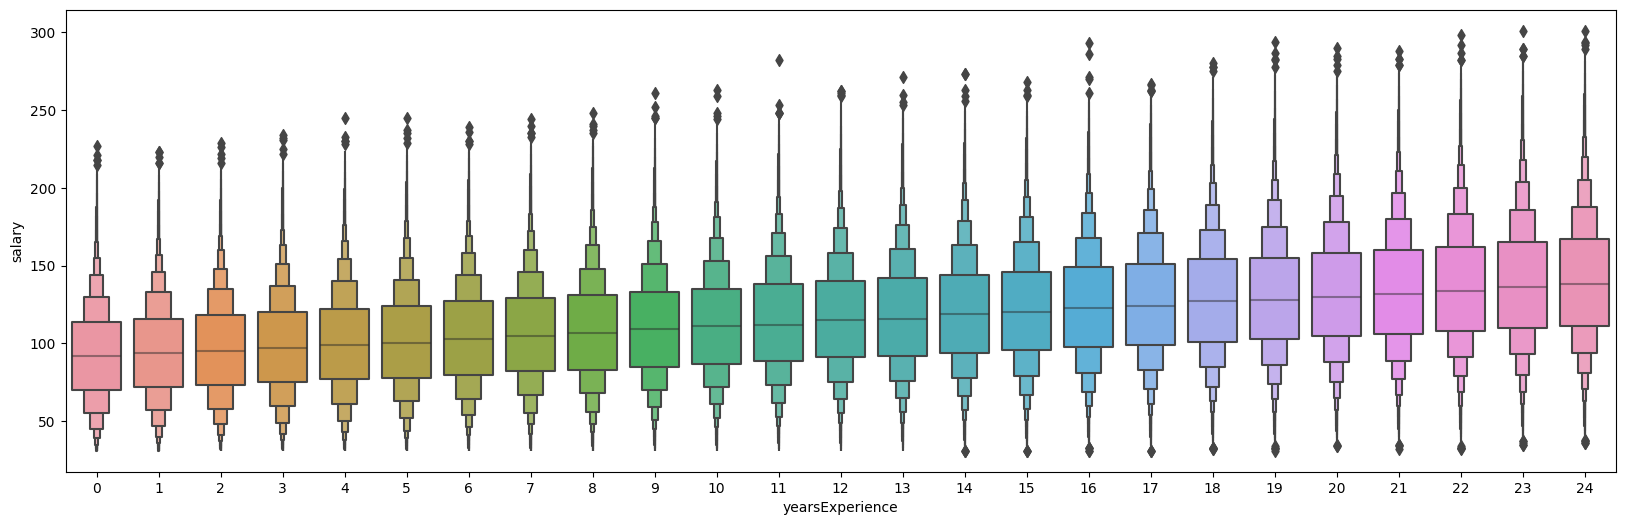

In [ ]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x = 'yearsExperience', y = 'salary', data = train_data)
plt.show()

#### Count Plot

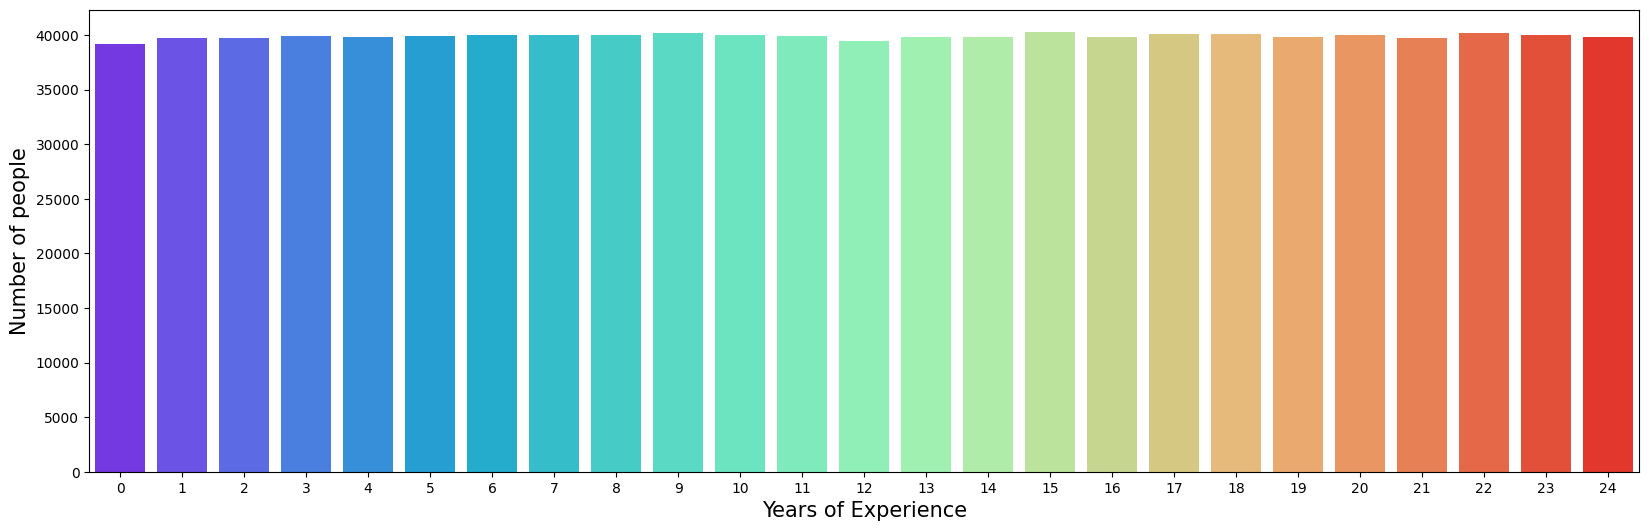

In [ ]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(x = 'yearsExperience', data = train_data, palette = 'rainbow')
plt.xlabel('Years of Experience', fontsize = 15)
plt.ylabel('Number of people', fontsize = 15)
plt.show()

From above count plot

Distribution of values of yearExperience is equal over complete dataset, symmetrical.

### Variation Inflation Factor

In [ ]:
# importing statsmodle library for vif
import statsmodels.api as sm

In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType', 'degree', 'major', 'industry', 'salary'], axis = 1)


# target values
target = train_data['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']


In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  # firting the OLS model on y and x
  model = sm.OLS(y,x)
  results = model.fit()
  # geting the r^2 value of results.
  rsq = results.rsquared
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



### ANNOVA TEST

##### **Normality Assumption Check**

##### Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable

##### **Homogeneity of variance Assumption Check**

In [ ]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  str(major))
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])
  print(conclusion)

  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


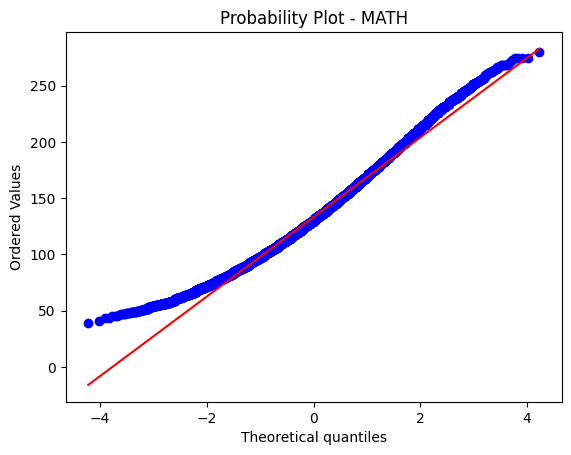

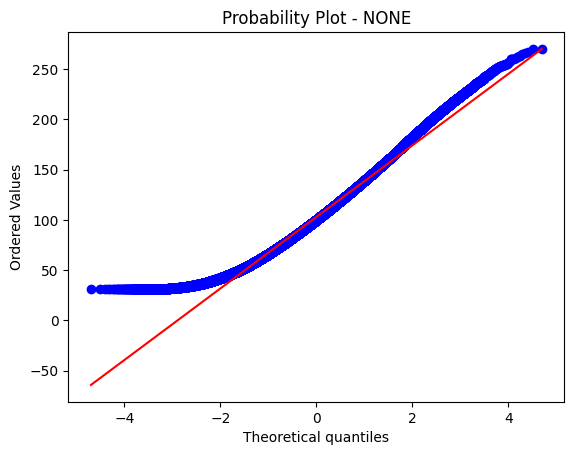

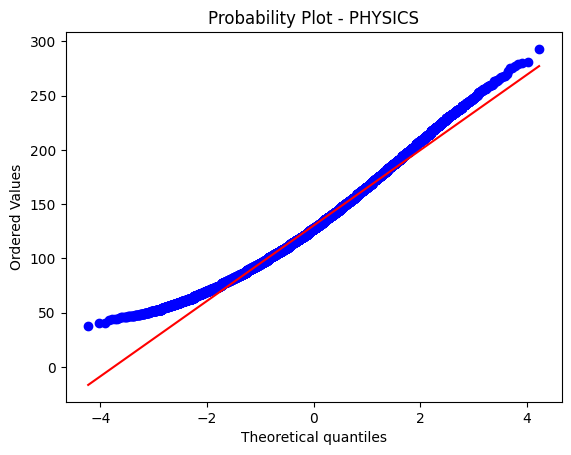

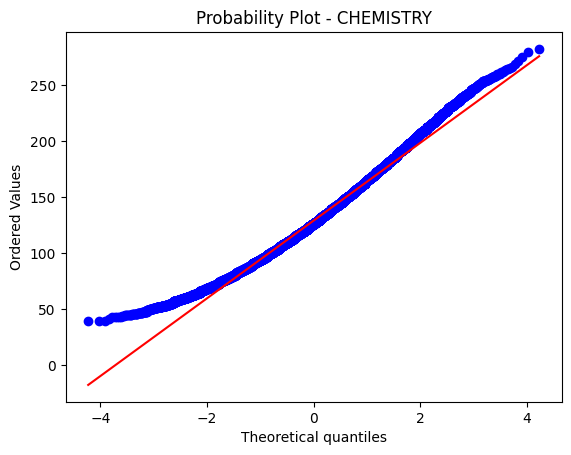

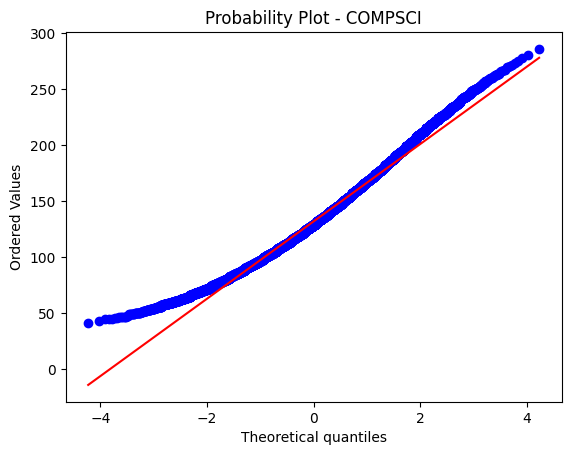

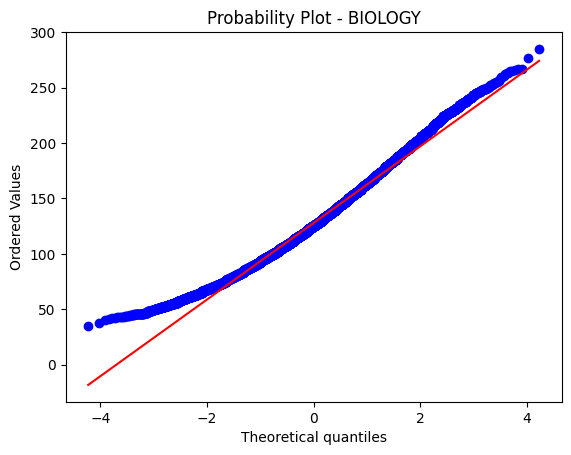

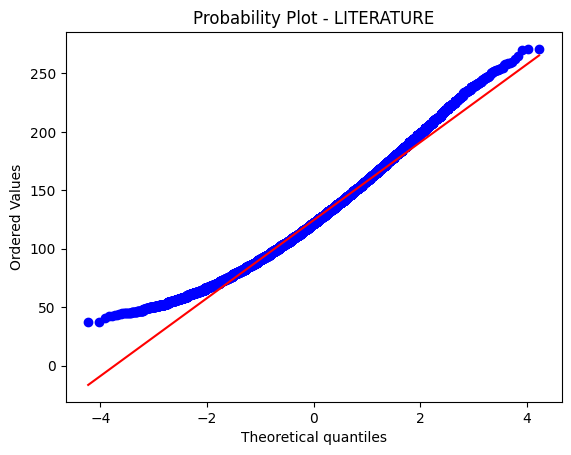

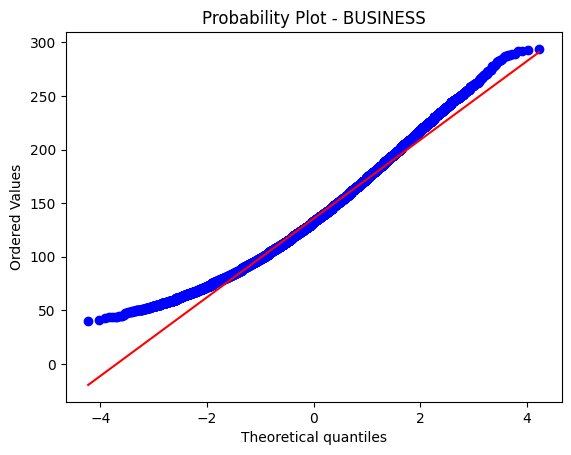

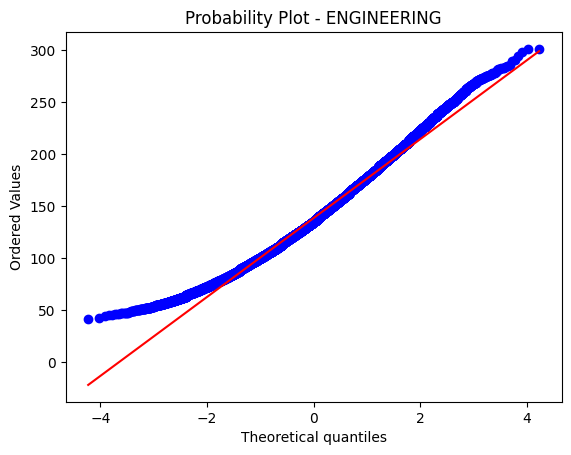

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2

In [ ]:
# performing anova test on major and salary

perform_anova_test('major', 'salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


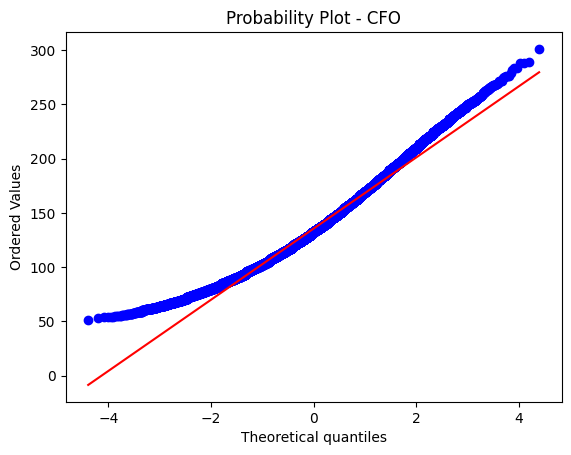

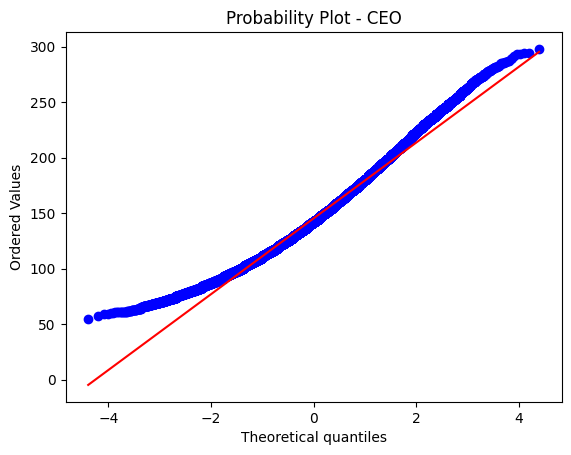

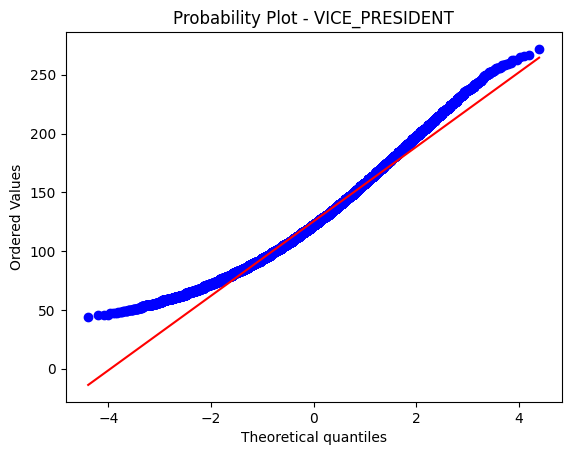

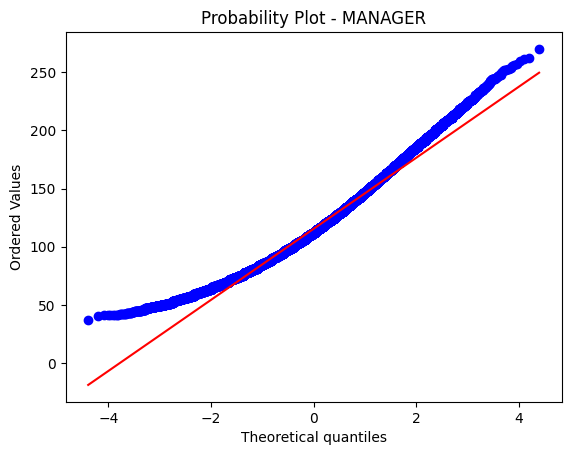

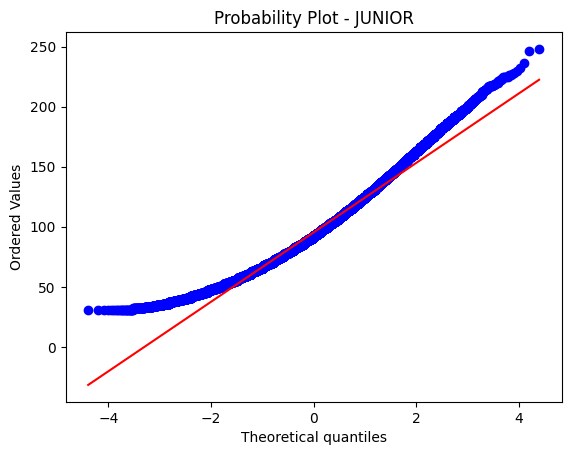

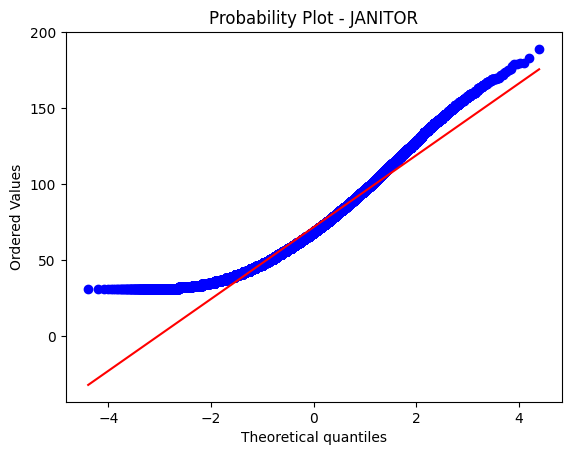

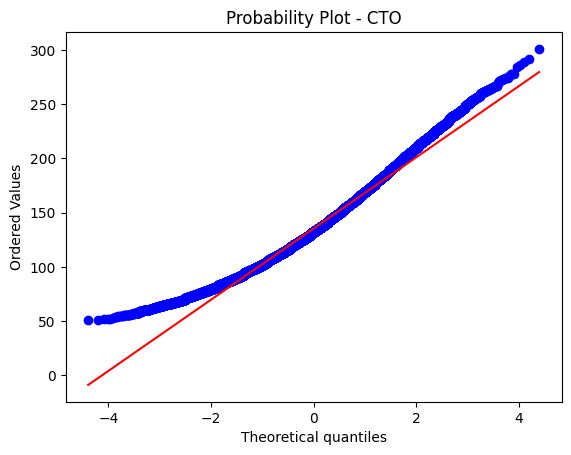

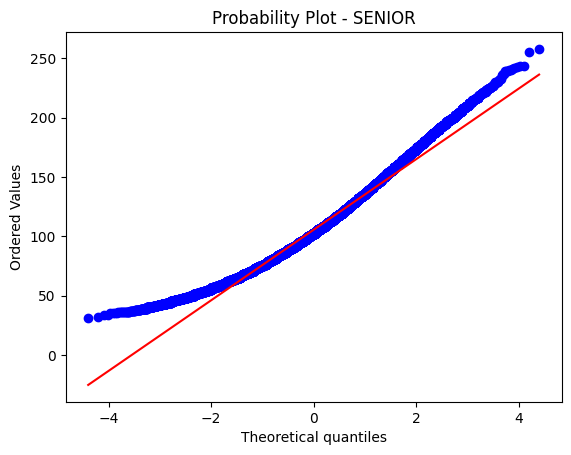

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9

In [ ]:
# perform anova test on jobtype and salary

perform_anova_test('jobType', 'salary')


        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


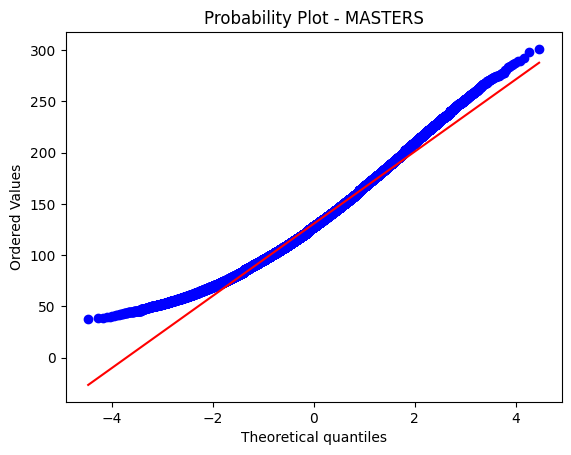

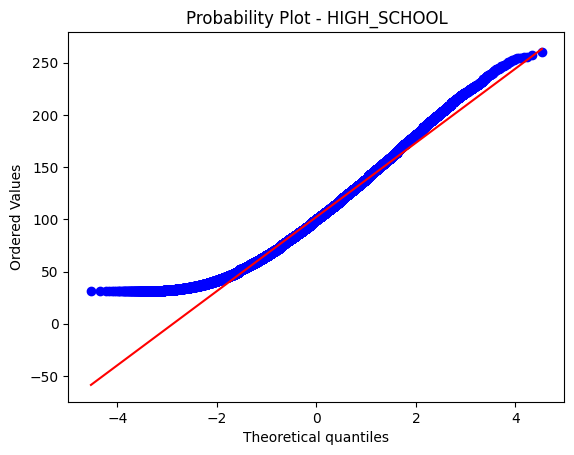

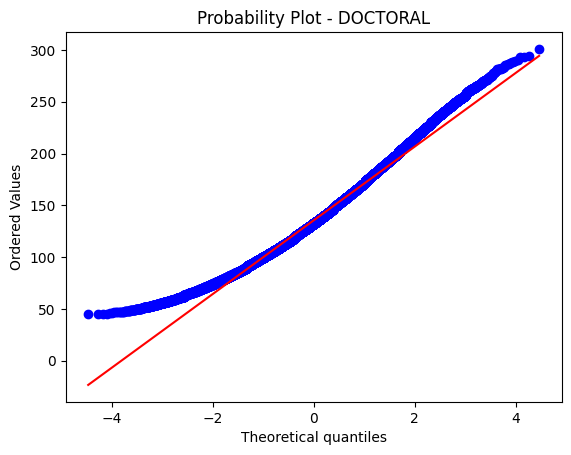

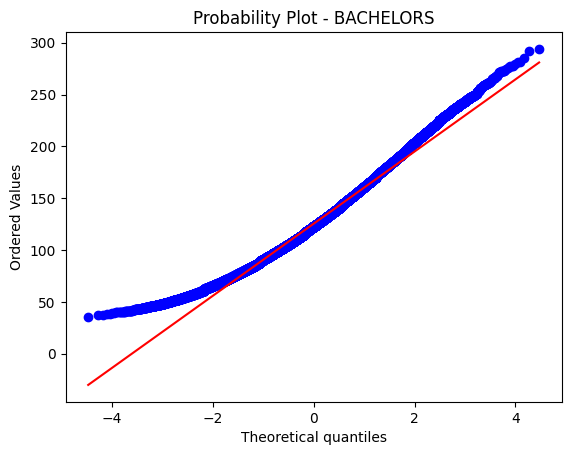

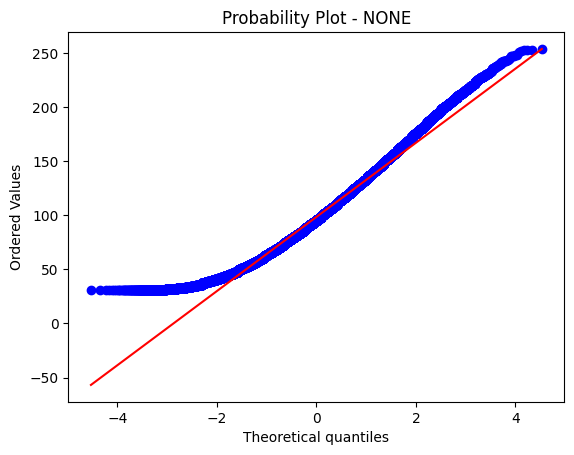

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47107.26230562572  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47

In [ ]:
# perform anova test on degree and salary

perform_anova_test('degree', 'salary')


    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


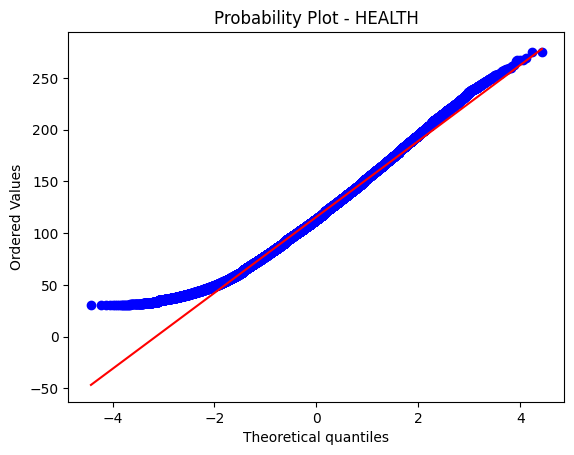

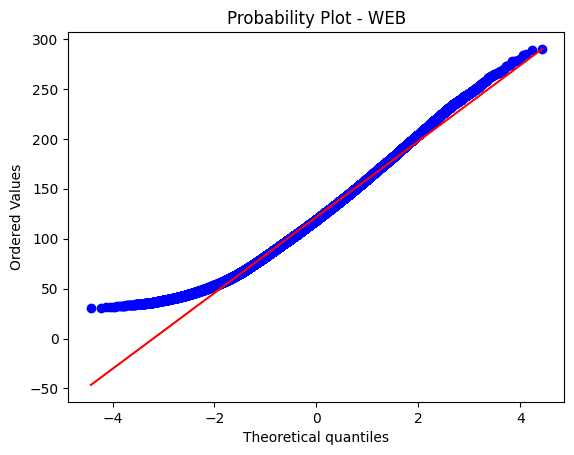

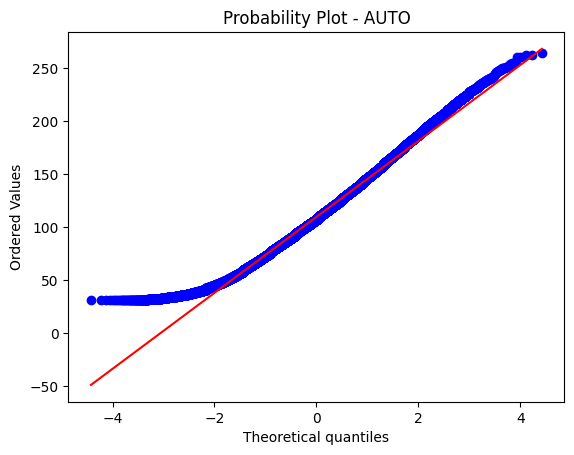

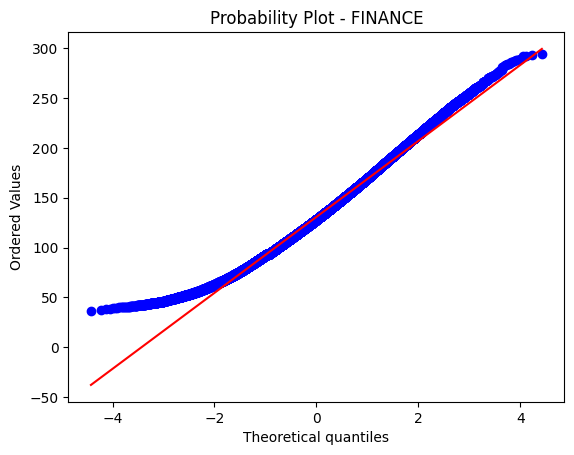

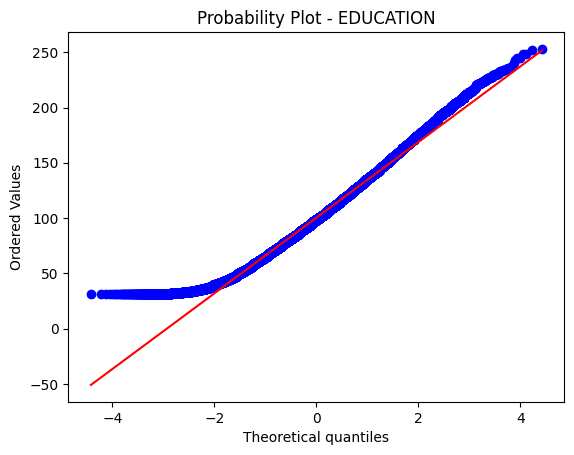

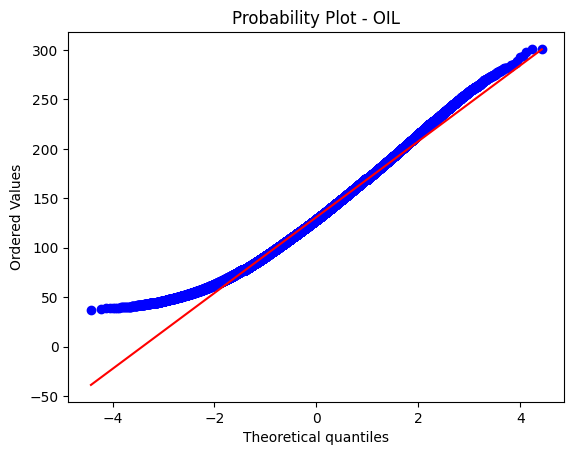

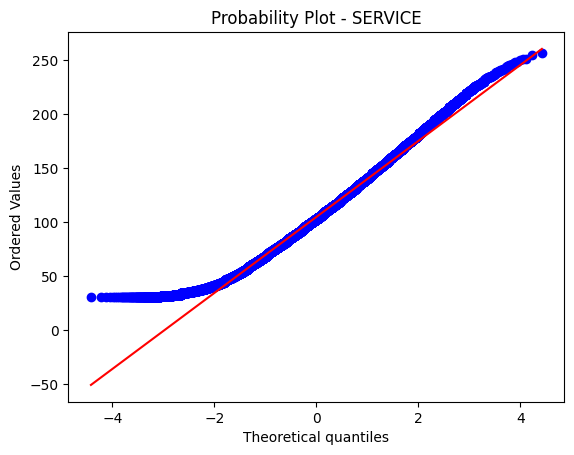

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 15497.25228748466  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 15497.252287

In [ ]:
# perform anova test on industry and salary

perform_anova_test('industry', 'salary')


          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234


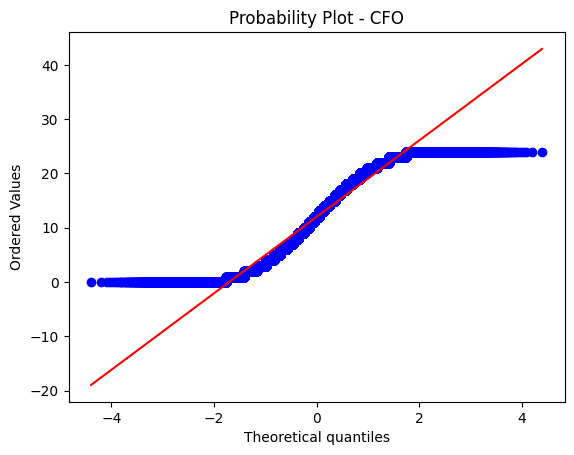

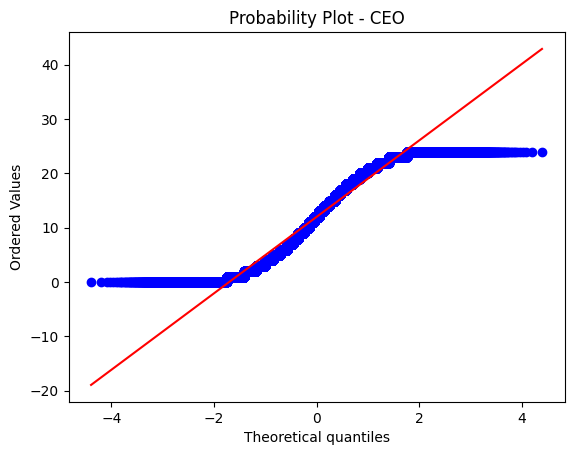

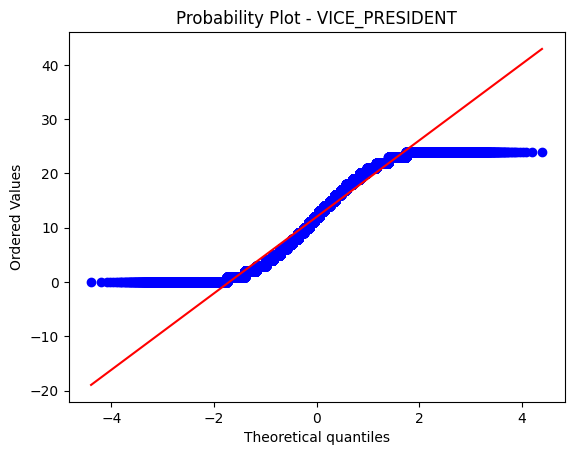

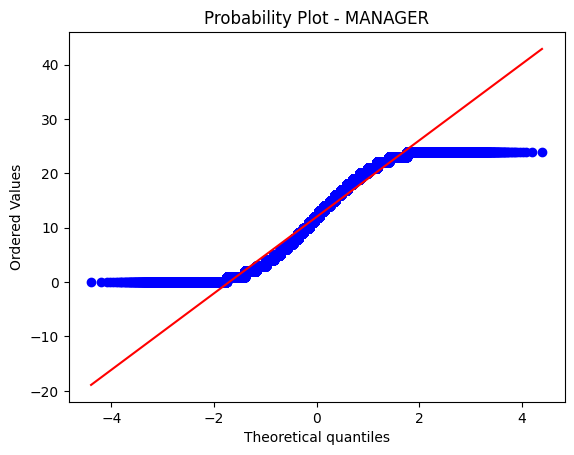

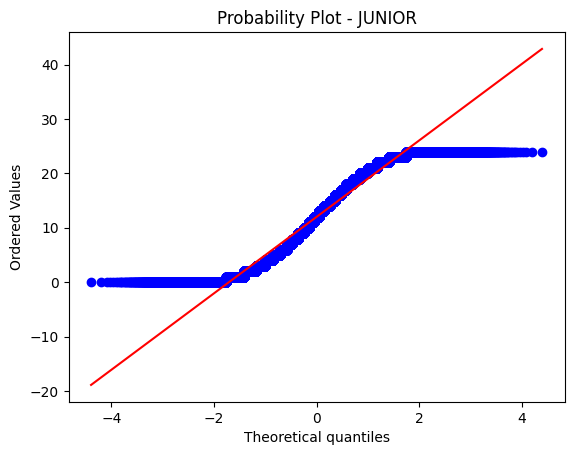

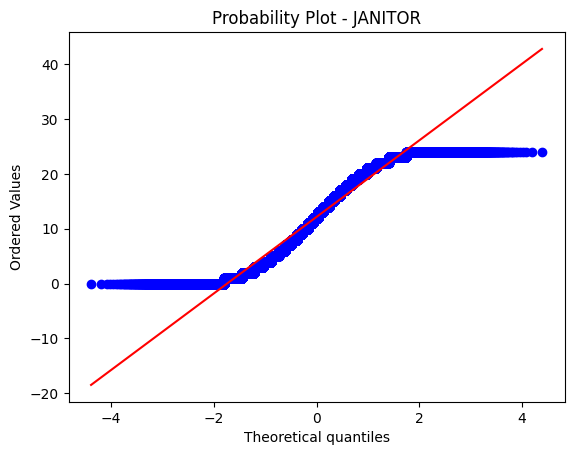

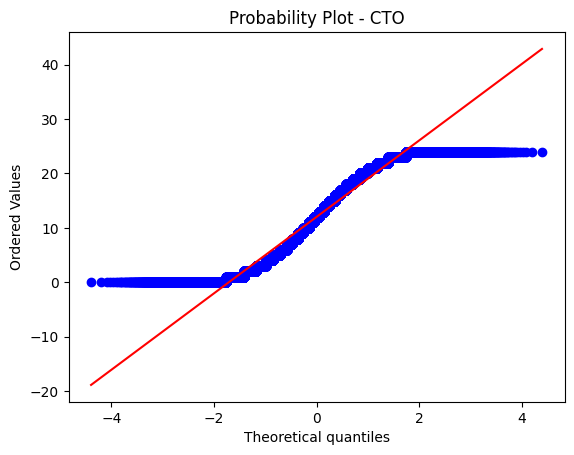

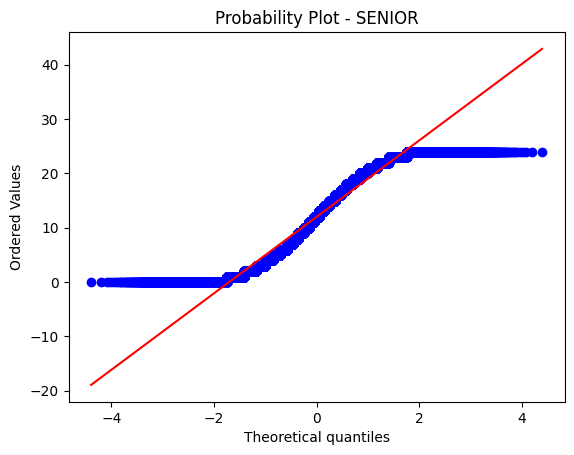

yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F P-value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                      F crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and p value is: 9.905482767358365e-09
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and critical value is: 2.2875503809

In [ ]:
# perform anova test on jobType and yearsExperience

perform_anova_test('jobType', 'yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


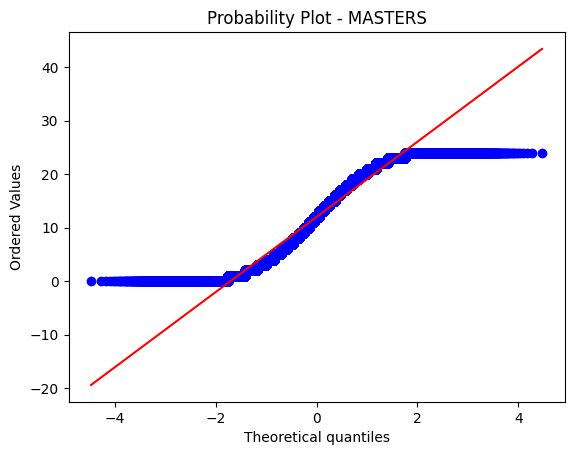

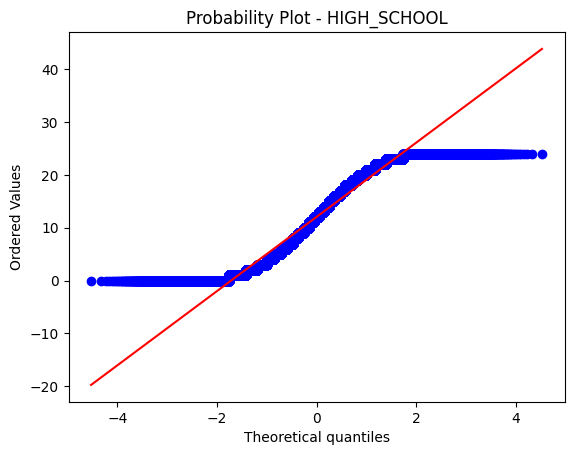

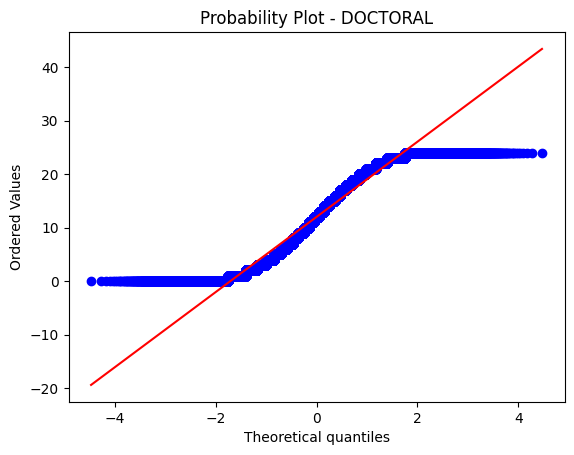

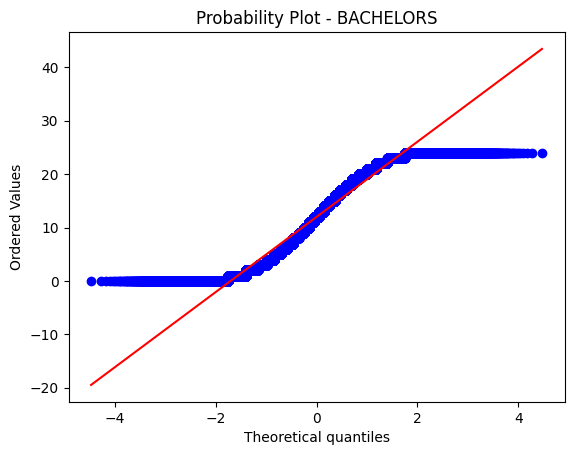

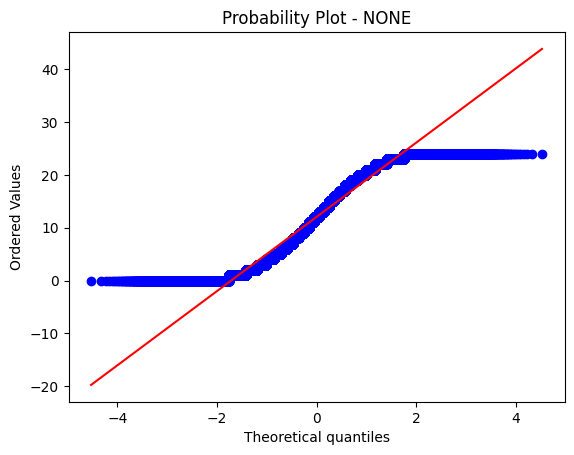

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [ ]:
# perform anova test on degree and yearsExperience

perform_anova_test('degree', 'yearsExperience')

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410


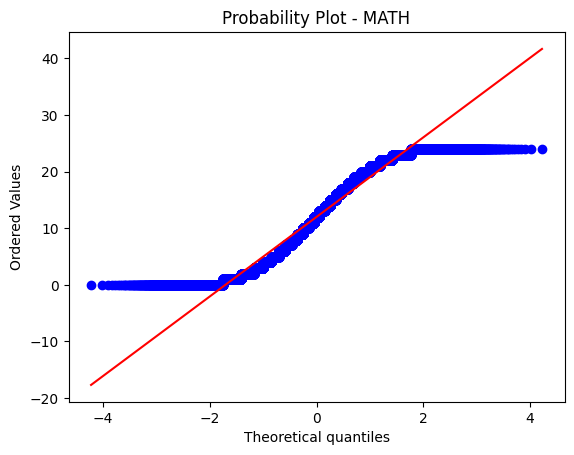

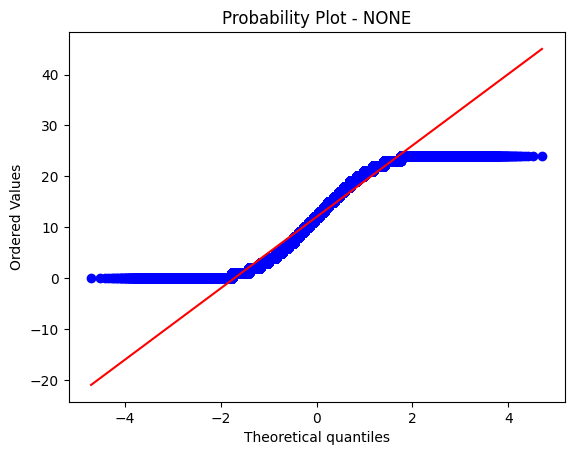

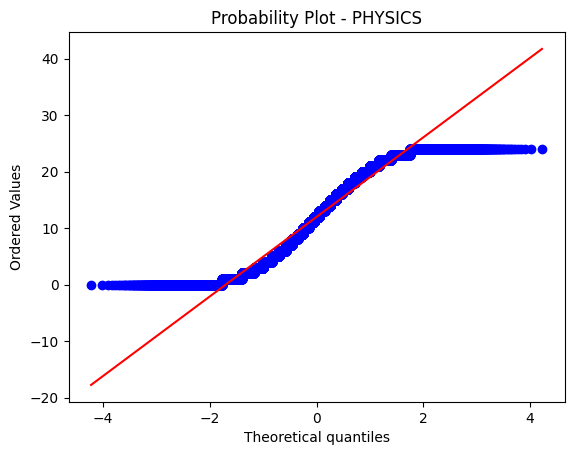

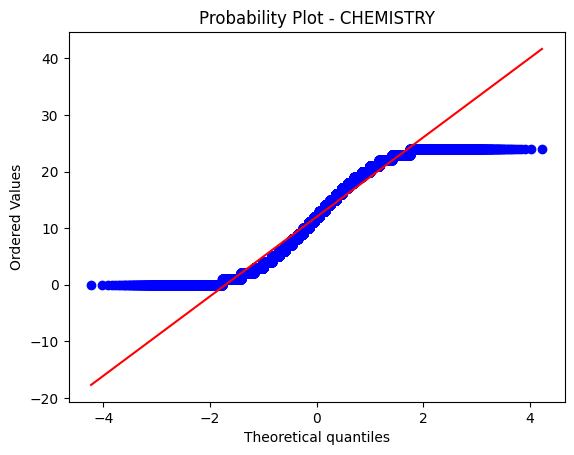

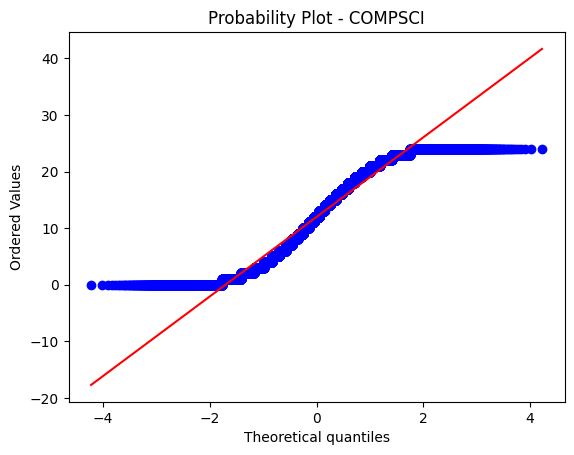

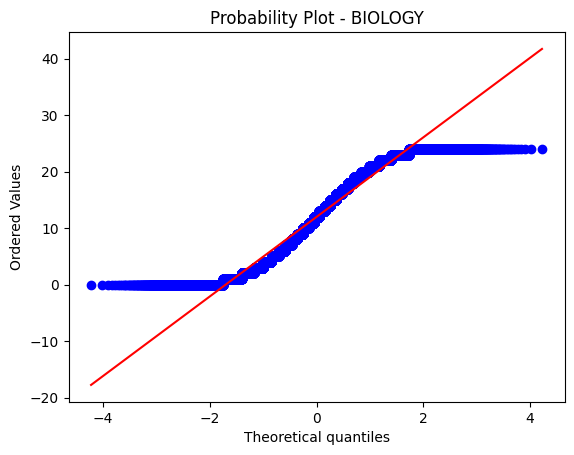

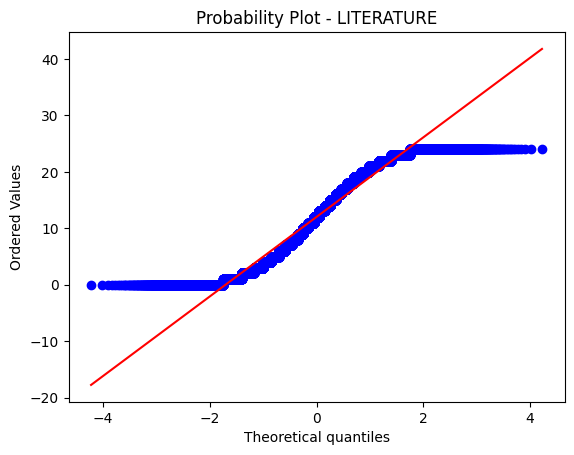

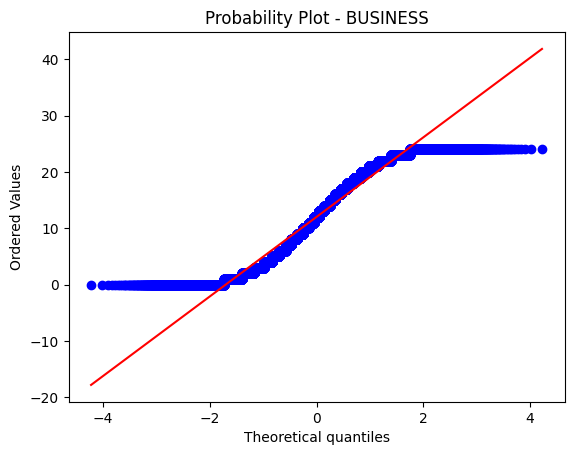

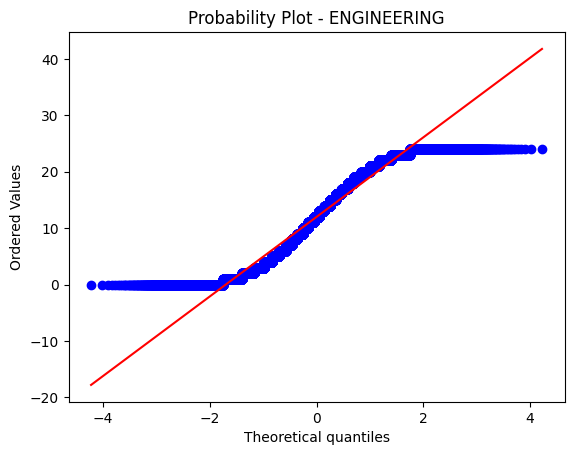

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and p value is: 0.2073404736822877
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and critical value is:

In [ ]:
# perform anova test on major and yearsExperience

perform_anova_test('major','yearsExperience' )



    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205


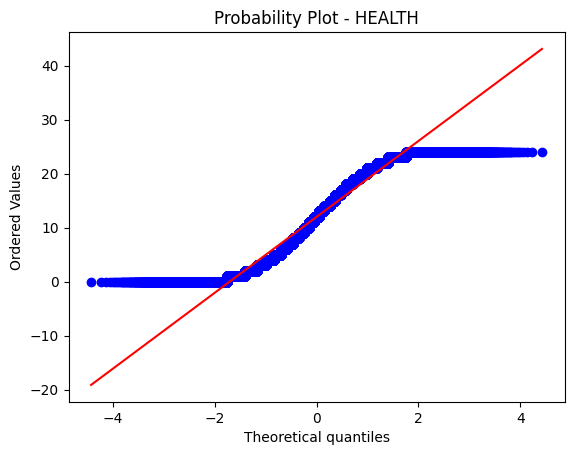

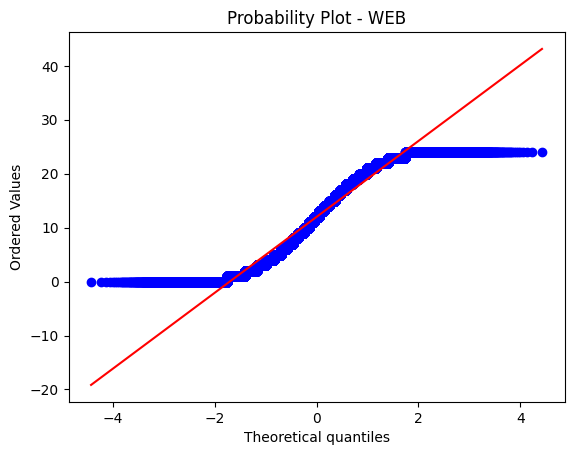

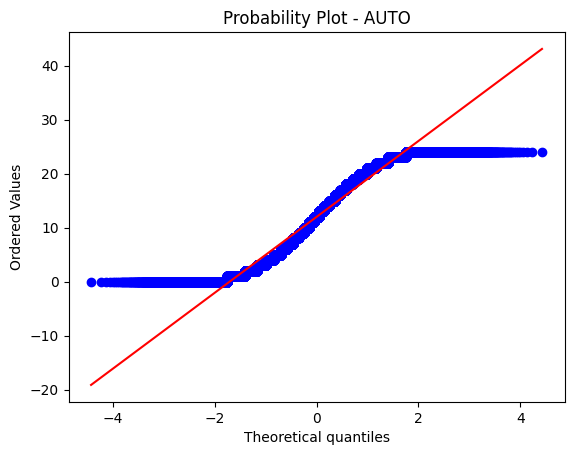

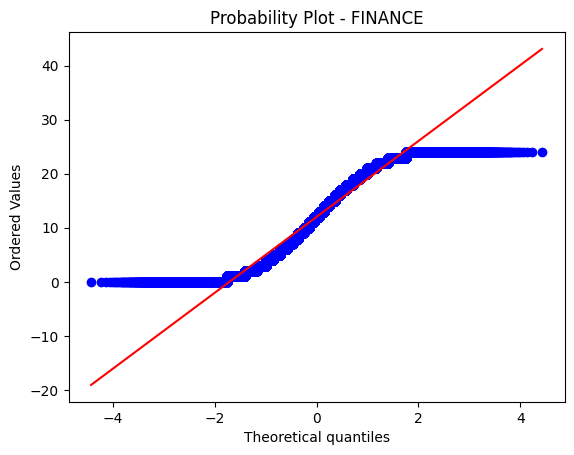

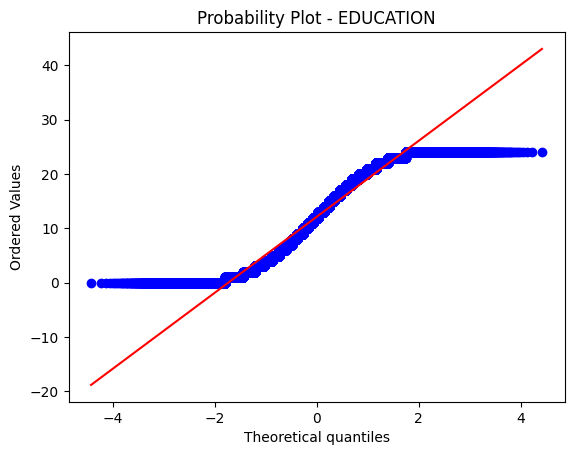

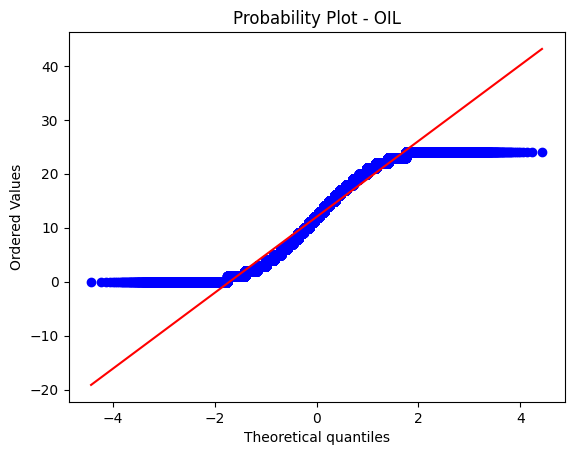

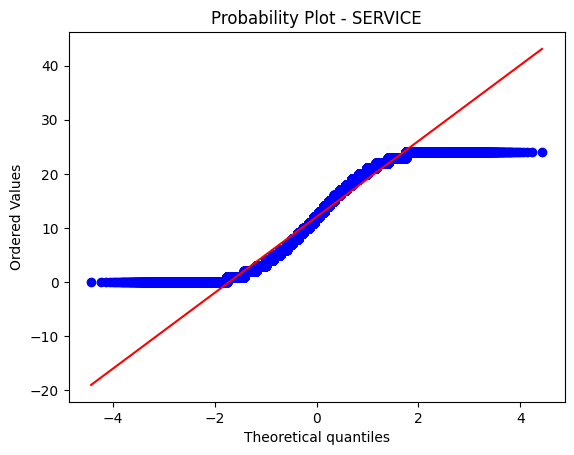

yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and p value is: 1.249142777282053e-05
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and critical value 

In [ ]:
# perform anova test on industry and yearsExperience

perform_anova_test('industry','yearsExperience' )

### Dendogram

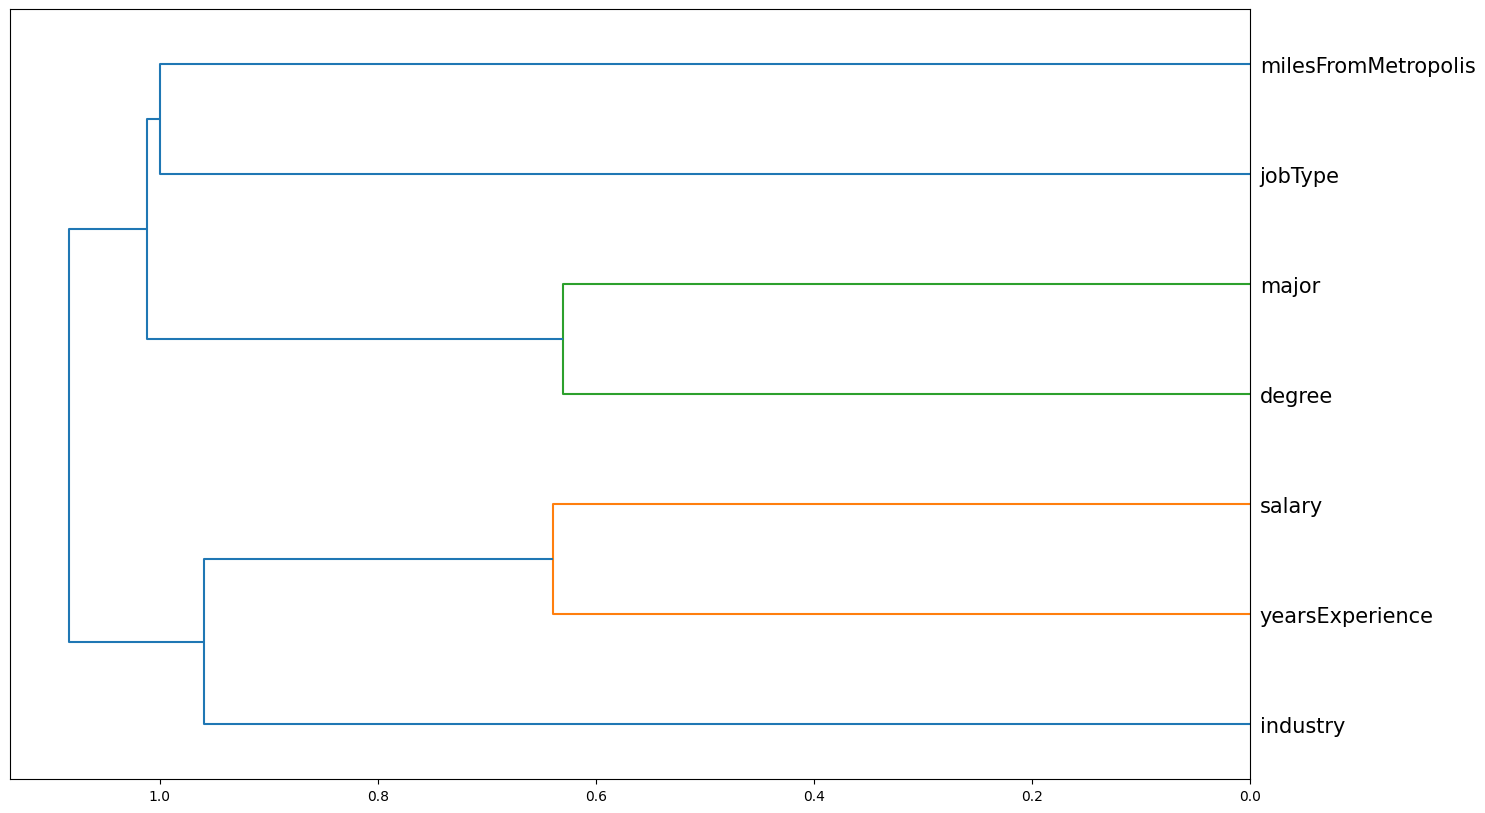

In [ ]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data



import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = X.columns, orientation = 'left', leaf_font_size = 15)

Observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

### Scaling the data

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):

  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [ ]:
# Making a list of the column names to be scaled
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data, col_train)

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [ ]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):

    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    # helper function to fit data
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    # helper function to transform data
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    # helper function to fit and transform data
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    # helper function to get new column names after fitting and tranforming data
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [ ]:
# Split the labels and the target
train_X = train_data.drop(['yearsExperience','milesFromMetropolis', 'salary'], axis = 1)
train_Y = train_data['salary']

In [ ]:
train_X.head()

,jobType,degree,major,industry
0,CFO,MASTERS,MATH,HEALTH
1,CEO,HIGH_SCHOOL,NONE,WEB
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [ ]:
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [ ]:
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()

,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.838384
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.737374
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.383838
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.171717
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.161616


In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size = 0.2)

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE
def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())

# Function for calculating all the relevant metrics
def print_score(m):
    res = [rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test),Y_test),
           m.score(X_train,Y_train), m.score(X_test,Y_test),
           median_absolute_error(m.predict(X_train),Y_train), median_absolute_error(m.predict(X_test),Y_test),
           metrics.mean_absolute_error(m.predict(X_train),Y_train), metrics.mean_absolute_error(m.predict(X_test),Y_test)]




    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


## Model Building and Evaluation

### Linear Regression

In [ ]:
%%time
# Fitting a Linear Regression model to the train dataset

# Importing LinearRegressor
from sklearn.linear_model import LinearRegression

# Model
lModel = LinearRegression()


# Fitting the model to the data
lModel.fit(X_train, Y_train)



# printing score of the model
print_score(lModel)




RMSE-Train: 19.620005353930164
RMSE-Test: 19.65556132635091
Score-Train: 0.7405970745405865
Score-Test: 0.7390217385118597
MedAE-Train: 13.765625
MedAE-Test: 13.78125
MeanAE-Train: 15.863921227748554
MeanAE-Test: 15.896422485088467 

CPU times: user 2.37 s, sys: 754 ms, total: 3.12 s
Wall time: 2.31 s


### Random Forest

In [ ]:
%%time
# Fitting a Random Forest Regressor model to the train dataset

# Importing RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor()


# Fitting the model to the data
rf.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])



# printing score of the model
print_score(rf)


RMSE-Train: 20.040185767136574
RMSE-Test: 20.54792548595976
Score-Train: 0.729187205793854
Score-Test: 0.715544635769039
MedAE-Train: 13.099999999999994
MedAE-Test: 13.92583333333333
MeanAE-Train: 15.819282879009235
MeanAE-Test: 16.41823434010006 

CPU times: user 2min 28s, sys: 1.29 s, total: 2min 29s
Wall time: 2min 29s


### KNN

In [ ]:
%%time
# Fitting a K-Neighbour Regressor model to the train dataset

# Importing KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model
knnr = KNeighborsRegressor()


# Fitting the model to the data
knnr.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])



# printing score of the model
print_score(knnr)


RMSE-Train: 28.52670801116144
RMSE-Test: 28.58273088486911
Score-Train: 0.4512569840030245
Score-Test: 0.4495909014700229
MedAE-Train: 19.19999999999999
MedAE-Test: 19.19999999999999
MeanAE-Train: 22.670148038063363
MeanAE-Test: 22.719481730239085 

CPU times: user 8min 1s, sys: 1.14 s, total: 8min 2s
Wall time: 4min 30s


### Decision Tree Regressor

In [ ]:
%%time
# Fitting a Decision Tree Regressor model to the train dataset

# Importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Model
DTR = DecisionTreeRegressor()

# Fitting the model to the data
DTR.fit(X_train, Y_train)


# printing score of the model
print_score(DTR)

RMSE-Train: 8.358924081846592
RMSE-Test: 26.20846391899979
Score-Train: 0.9528842125517869
Score-Test: 0.5372341536938474
MedAE-Train: 0.0
MedAE-Test: 16.0
MeanAE-Train: 4.199403181685479
MeanAE-Test: 20.324152472077508 

CPU times: user 8.76 s, sys: 439 ms, total: 9.2 s
Wall time: 9.18 s


### Gradient Boost

In [ ]:
%%time
# Fitting a Gradient Boosting Regressor model to the train dataset

# Importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model
GBR = GradientBoostingRegressor()

# Fitting the model to the data
GBR.fit(X_train, Y_train)

# printing score of the model
print_score(GBR)


RMSE-Train: 19.412402791738913
RMSE-Test: 19.391526268005467
Score-Train: 0.7458885231918196
Score-Test: 0.7466609430861849
MedAE-Train: 13.683926087071125
MedAE-Test: 13.619621549439337
MeanAE-Train: 15.697082162231574
MeanAE-Test: 15.656842259228469 

CPU times: user 2min, sys: 659 ms, total: 2min
Wall time: 2min


### XG Boost

In [ ]:
%%time
# Fitting a XGB Regressor model to the train dataset

# Importing XGBRegressor
from xgboost import XGBRegressor

# Model
xgbr = XGBRegressor()


# Fitting the model to the data
xgbr.fit(X_train, Y_train)

# print score of the model
print_score(xgbr)

RMSE-Train: 18.785215586574083
RMSE-Test: 18.97030505589446
Score-Train: 0.7622015641734514
Score-Test: 0.7569016219754914
MedAE-Train: 13.345443725585938
MedAE-Test: 13.406463623046875
MeanAE-Train: 15.266359413023475
MeanAE-Test: 15.408468290761768 

CPU times: user 4min 19s, sys: 481 ms, total: 4min 19s
Wall time: 2min 32s


In [ ]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [ ]:
# list of models object
# list of models name
models= [lModel, DTR, rf, knnr, GBR, xgbr]
names = ['lModel', 'Dtree', 'Forest', 'Knn','GBR', 'XG Boost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

NotFittedError: ignored

In [ ]:
comp_model_train

,Metric,lModel,Dtree,Forest,Knn,GBR,AdaBoost
0,rmse,19.629561,8.358924,20.040186,28.526708,19.412403,25.786562
1,MedAE,13.773170,0.000000,13.100000,19.200000,13.683926,19.519115
2,MAE,15.875192,4.199403,15.819283,22.670148,15.697082,21.411045
3,R-squared,0.648962,0.950555,0.653663,-0.080661,0.606765,0.154397


In [ ]:
comp_model_test

,Metric,lModel,Dtree,Forest,Knn,GBR,AdaBoost
0,rmse,19.616387,26.208464,20.547925,28.582731,19.391526,25.746711
1,MedAE,13.730972,16.000000,13.925833,19.200000,13.619622,19.459148
2,MAE,15.850602,20.324152,16.418234,22.719482,15.656842,21.354067
3,R-squared,0.650289,0.529214,0.634260,-0.082792,0.608651,0.156912


## Hyperparameter Tuning

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation,
  # search across different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid,
                              n_iter = 20, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
  random.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
  print(random.best_params_)

In [ ]:
# Tuning Random Forest
# create parameters dict for tunning

rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True, dtype = int),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(), X_train, Y_train, param_grid = rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27, 'bootstrap': False}


In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200],
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True, dtype= int),
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(), X_train, Y_train, param_grid = GBR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8, 'learning_rate': 0.25}


In [ ]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True, dtype = int),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeRegressor(), X_train, Y_train, param_grid =DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5}


In [ ]:
# create XGBRegressor parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4]
 }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(XGBRegressor(), X_train, Y_train, param_grid = XGB_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using Best Parameters to Train the Models

### Random Forest

In [ ]:
%%time
# Fitting a Random Forest Regressor model to the train dataset

# Importing RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(**{'n_estimators': 64 , 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27, 'bootstrap': False})

# Fitting the model to the data
rf.fit(X_train, Y_train)

# printing score of the model
print_score(rf)



RMSE-Train: 30.0013351272594
RMSE-Test: 29.843089829217732
Score-Train: 0.39346231272762666
Score-Test: 0.3983817471125197
MedAE-Train: 20.56275446981752
MedAE-Test: 20.533908769263604
MeanAE-Train: 24.06179408703855
MeanAE-Test: 23.934735496854703 

CPU times: user 1min 23s, sys: 204 ms, total: 1min 23s
Wall time: 1min 23s


### Gradient Boost

In [ ]:
%%time
# Fitting a Gradient Boosting Regressor model to the train dataset

# Importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model
GBR = GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 0.1,
                                  'max_depth': 8, 'learning_rate': 0.25})

# Fitting the model to the data
GBR.fit(X_train, Y_train)

# printing score of the model
print_score(GBR)

RMSE-Train: 19.07165680248076
RMSE-Test: 19.110488777478206
Score-Train: 0.7548942653748345
Score-Test: 0.7532955282492151
MedAE-Train: 13.462857967000723
MedAE-Test: 13.459431822505486
MeanAE-Train: 15.469258266400763
MeanAE-Test: 15.50004241531733 

CPU times: user 2min 40s, sys: 338 ms, total: 2min 40s
Wall time: 2min 41s


### Decision Tree

In [ ]:
%%time
# Fitting a Decision Tree Regressor model to the train dataset

# Importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Model
DTR = DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2,
                               'max_features': None, 'max_depth': 20})

# Fitting the model to the data
DTR.fit(X_train, Y_train)


# printing score of the model
print_score(DTR)

RMSE-Train: 35.690860239915416
RMSE-Test: 35.644930464045125
Score-Train: 0.14159812448260212
Score-Test: 0.14172003376371822
MedAE-Train: 24.53562017612458
MedAE-Test: 24.53562017612458
MeanAE-Train: 28.686417111338077
MeanAE-Test: 28.629741862060442 

CPU times: user 770 ms, sys: 80.1 ms, total: 850 ms
Wall time: 857 ms


### XG Boost

In [ ]:
%%time
# Fitting a XGB Regressor model to the train dataset

# Importing XGBRegressor
from xgboost import XGBRegressor

# Model
xgbr = XGBRegressor(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15,
                       'gamma': 0.1, 'colsample_bytree': 0.4})


# Fitting the model to the data
xgbr.fit(X_train, Y_train)

# print score of the model
print_score(xgbr)

RMSE-Train: 18.93615976912981
RMSE-Test: 18.9876612272337
Score-Train: 0.7583646637760881
Score-Test: 0.756456590942557
MedAE-Train: 13.428022384643555
MedAE-Test: 13.428403854370117
MeanAE-Train: 15.378844876327
MeanAE-Test: 15.420222917195101 

CPU times: user 1min 56s, sys: 675 ms, total: 1min 57s
Wall time: 1min 6s
